In [20]:
import os
os.getcwd()

'C:\\Users\\lenovo\\Desktop\\JN'

In [21]:
import pandas as pd
import seaborn as sns

In [22]:
df=pd.read_csv('Admission_Predict.csv')

In [23]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [24]:
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [25]:
from sklearn.preprocessing import Binarizer
bi = Binarizer (threshold=0.75)
df['Chance of Admit ']= bi.fit_transform(df[['Chance of Admit ']])

In [26]:
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1               1.0  
1         1               1.0  
2         1               0.0  
3         1               1.0  
4         0               0.0

In [27]:
x=df.drop('Chance of Admit ', axis=1)
y=df['Chance of Admit ']

In [28]:
y=y.astype('int')

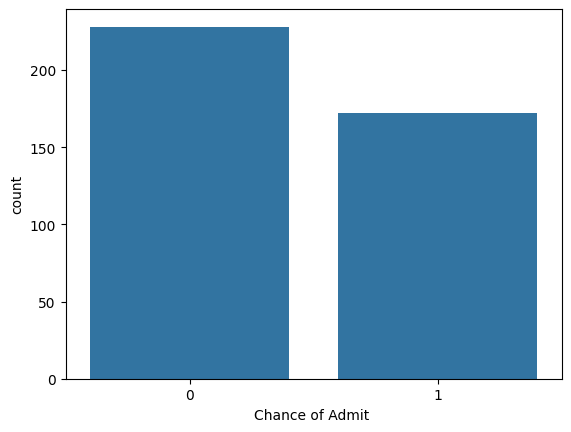

In [29]:
sns.countplot(x=y);

In [32]:
#cross validation
from sklearn .model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, random_state=0, test_size=0.25)

In [33]:
x_train.shape

(300, 8)

In [34]:
y_train.shape

(300,)

In [35]:
x_test

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
132         133        309          105                  5  3.5   3.5  8.56   
309         310        308          110                  4  3.5   3.0  8.60   
341         342        326          110                  3  3.5   3.5  8.76   
196         197        306          105                  2  3.0   2.5  8.26   
246         247        316          105                  3  3.0   3.5  8.73   
..          ...        ...          ...                ...  ...   ...   ...   
146         147        315          105                  3  2.0   2.5  8.48   
135         136        314          109                  4  3.5   4.0  8.77   
390         391        314          102                  2  2.0   2.5  8.24   
264         265        325          110                  2  3.0   2.5  8.76   
364         365        313          102                  3  3.5   4.0  8.90   

     Research  
132         0  
309         0  
341         1  
196         0  
246         0  
..        ...  
146         0  
135         1  
390         0  
264         1  
364         1  

[100 rows x 8 columns]

In [37]:
#import the class
from sklearn.tree import DecisionTreeClassifier

In [38]:
classifier=DecisionTreeClassifier(random_state=0)

In [41]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [42]:
y_pred=classifier.predict(x_test)

In [48]:
result=pd.DataFrame({
    'actual':y_test,
'predicted': y_pred,
})

In [49]:
result

actual  predicted
132       0          0
309       0          0
341       1          1
196       0          0
246       0          1
..      ...        ...
146       0          0
135       1          1
390       0          0
264       0          0
364       1          1

[100 rows x 2 columns]

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

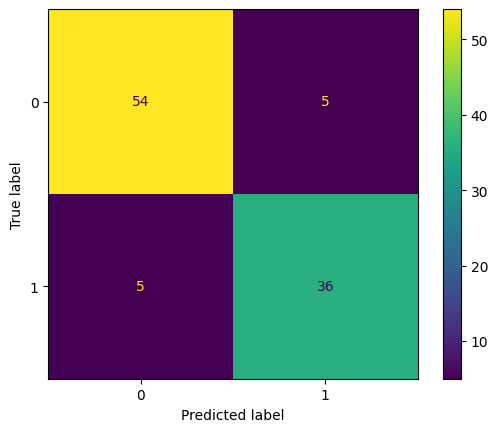

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [53]:
accuracy_score(y_test, y_pred)

0.9

In [54]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.88      0.88      0.88        41

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100

